In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo8-squartsquart/squart.mp4


In [51]:
pip list | grep torch

pytorch-ignite                     0.5.2
pytorch-lightning                  2.5.1.post0
torch                              2.6.0+cu124
torchao                            0.10.0
torchaudio                         2.6.0+cu124
torchdata                          0.11.0
torchinfo                          1.8.0
torchmetrics                       1.7.1
torchsummary                       1.5.1
torchtune                          0.6.1
torchvision                        0.21.0+cu124
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip list | grep 

Usage: grep [OPTION]... PATTERNS [FILE]...
Try 'grep --help' for more information.
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install ultralytics==8.3.160


Note: you may need to restart the kernel to use updated packages.


In [54]:
from ultralytics import YOLO
model = YOLO("yolov8m-pose.pt")

In [55]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
YOLO                                                    --
├─PoseModel: 1-1                                        --
│    └─Sequential: 2-1                                  --
│    │    └─Conv: 3-1                                   (1,392)
│    │    └─Conv: 3-2                                   (41,664)
│    │    └─C2f: 3-3                                    (111,360)
│    │    └─Conv: 3-4                                   (166,272)
│    │    └─C2f: 3-5                                    (813,312)
│    │    └─Conv: 3-6                                   (664,320)
│    │    └─C2f: 3-7                                    (3,248,640)
│    │    └─Conv: 3-8                                   (1,991,808)
│    │    └─C2f: 3-9                                    (3,985,920)
│    │    └─SPPF: 3-10                                  (831,168)
│    │    └─Upsample: 3-11                              --
│    │    └─Concat: 3-12             

In [56]:
import torch
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.6.0+cu124  Device: cpu


In [57]:
model = model.to(DEVICE)

In [58]:
pip install opencv -python


Usage:   
  /usr/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /usr/bin/python3 -m pip install [options] [-e] <local project path> ...
  /usr/bin/python3 -m pip install [options] <archive url/path> ...

no such option: -p
Note: you may need to restart the kernel to use updated packages.


In [59]:
import cv2

In [60]:
capture = cv2.VideoCapture("/kaggle/input/yolo8-squartsquart/squart.mp4")

In [61]:
capture.get(cv2.CAP_PROP_FRAME_COUNT)


1501.0

In [74]:
from ultralytics.utils.plotting import Annotator
def draw_keypoints(result, frame):
    tmp_pose=[]
    global nkps
    
    annotator = Annotator(frame, line_width=1)
    for kps in result.keypoints:
        kps = kps.data.squeeze()
        annotator.kpts(kps)
       
        nkps = kps.cpu().numpy()
        # nkps[:,2] = 1
        # annotator.kpts(nkps)
        tmp_pose['왼쪽엉덩이'] = nkps[11]
        tmp_pose['오른쪽엉덩이'] = nkps[12]
        for idx, (x, y, score) in enumerate(nkps):
            if score > 0.5:
                cv2.circle(frame, (int(x), int(y)), 3, (0, 0, 255), cv2.FILLED)
                cv2.putText(frame, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
    pose.append([tmp_pose])
    return frame


In [75]:
def predict(frame, iou=0.7, conf=0.25):
    results = model(source=frame,
            device='cpu',
            iou=iou ,
            conf=conf ,
            verbose=False,
            )
    return results[0]


def draw_boxes(result, frame):
    for boxes in result.boxes:
        x1, y1, x2, y2, score, classes = boxes.data.squeeze().cpu().numpy()
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 1)
    return frame


In [76]:
capture = cv2.VideoCapture("/kaggle/input/yolo8-squartsquart/squart.mp4")
pose = []
while True:
    ret, frame = capture.read()
    # print(capture.get(cv2.CAP_PROP_POS_FRAMES))
    state_frame = capture.get(cv2.CAP_PROP_POS_FRAMES)
    if state_frame % 30 == 0:
        print("저장")
        result = predict(frame)
    # frame = draw_boxes(result, frame)
        frame = draw_keypoints(result, frame)
    # frame = cv2.flip(frame, 1)


    # cv2.putText(frame, text, position, font, scale, color, thickness)
    if not ret:
        print("영상 오류")
        capture.release()
        cv2.destroyAllWindows()
        break


저장


TypeError: list indices must be integers or slices, not str

In [65]:
left_ = []
for left in pose:
    try:
        left_.append(left[0]['왼쪽엉덩이'][1])
    except:
        break


In [66]:
right_ = []
for left in pose:
    try:
        right_.append(left[0]['오른쪽엉덩이'][1])
    except:
        break


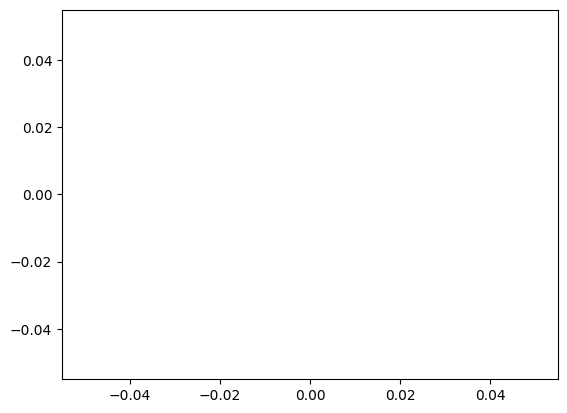

In [67]:
import matplotlib.pyplot as plt 
import numpy as np
plt.plot(np.arange(len(left_)), left_)
plt.plot(np.arange(len(left_)), right_)
plt.show()
